# DSO105 Int Stats Page 4 and 5 revamp

In [2]:
## in R

In [3]:
## load libraries


install.packages('rcompanion')
install.packages('car')
install.packages('readxl')

library(tidyverse)
library(IDPmisc)
library(rcompanion)
library(car)
library(readxl)

Installing package into 'C:/Users/nolan/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'rcompanion' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nolan\AppData\Local\Temp\RtmpSAd7V4\downloaded_packages


Installing package into 'C:/Users/nolan/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nolan\AppData\Local\Temp\RtmpSAd7V4\downloaded_packages


Installing package into 'C:/Users/nolan/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'readxl' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'readxl'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\nolan\OneDrive\Documents\R\win-library\4.1\00LOCK\readxl\libs\x64\readxl.dll to C:\Users\nolan\OneDrive\Documents\R\win-library\4.1\readxl\libs\x64\readxl.dll: Permission denied"
Warning message:
"restored 'readxl'"



The downloaded binary packages are in
	C:\Users\nolan\AppData\Local\Temp\RtmpSAd7V4\downloaded_packages


-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.2     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some




In [4]:
## load data for one way between subjects Anova in R

In [28]:
cc = read.csv('../../datasets/PlayData/BankChurners.csv')

In [29]:
head(cc)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,...,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691,777,11914,1.335,1144,42,1.625,0.061,9.3448e-05,0.99991
2,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256,864,7392,1.541,1291,33,3.714,0.105,5.6861e-05,0.99994
3,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418,0,3418,2.594,1887,20,2.333,0.000,2.1081e-05,0.99998
4,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313,2517,796,1.405,1171,20,2.333,0.760,1.3366e-04,0.99987
5,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716,0,4716,2.175,816,28,2.500,0.000,2.1676e-05,0.99998
6,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010,1247,2763,1.376,1088,24,0.846,0.311,5.5077e-05,0.99994


#### list out all column value counts to get an idea of your data and what to look for

In [30]:
unique(cc[c("Card_Category")])
## lets see if there is a difference in age among the 4 card categories.

,Card_Category
,<chr>
1,Blue
7,Gold
8,Silver
444,Platinum


In [ ]:
## make sure your DV is continuous (age is already)

## One Way Between Subjects ANOVAs in R

Now that you have a basic idea about what an ANOVA is, you will learn how to create ANOVAs in R, starting with the One Way ANOVA.

## Load Libraries

ANOVAs come as part of the base package in R, so the only libraries you will need to load in are dplyr because you'll need it for some data wrangling, rcompanion because you'll use it to check for the assumption of normality, and car if you need to run an ANOVA that will correct for a violation of homogeneity of variance.

## Question Setup

With this data, you will answer the question:

*Is there a difference in age among the 4 card categories?*

**In order to answer this question, your x, or independent variable, will be the Card_Category, which has four levels: Blue, Silver, Gold, and Platinum. Your y, or dependent variable, will be the Customer_Age. As with all ANOVAs, the IV will be categorical, and the DV will be continuous.**

## Data Wrangling

Depending on the data that you've been given, it may need some wrangling!

## Filter the Data and Remove Missing Values

In this case we do not need to filter any of our categorical variables, because we are using all four card levels. All that is left is to drop the missing data and make sure our DV (Customer_Age) is numeric.

In [31]:
cc1 = na.omit(cc)

In [32]:
head(cc1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,...,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691,777,11914,1.335,1144,42,1.625,0.061,9.3448e-05,0.99991
2,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256,864,7392,1.541,1291,33,3.714,0.105,5.6861e-05,0.99994
3,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418,0,3418,2.594,1887,20,2.333,0.000,2.1081e-05,0.99998
4,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313,2517,796,1.405,1171,20,2.333,0.760,1.3366e-04,0.99987
5,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716,0,4716,2.175,816,28,2.500,0.000,2.1676e-05,0.99998
6,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010,1247,2763,1.376,1088,24,0.846,0.311,5.5077e-05,0.99994


In [36]:
str(cc1)
## Customer_Age is an integer so we are good to proceed!

'data.frame':	10127 obs. of  23 variables:
 $ CLIENTNUM                                                                                                                         : int  768805383 818770008 713982108 769911858 709106358 713061558 810347208 818906208 710930508 719661558 ...
 $ Attrition_Flag                                                                                                                    : chr  "Existing Customer" "Existing Customer" "Existing Customer" "Existing Customer" ...
 $ Customer_Age                                                                                                                      : int  45 49 51 40 40 44 51 32 37 48 ...
 $ Gender                                                                                                                            : chr  "M" "F" "M" "F" ...
 $ Dependent_count                                                                                                                   : int  3 5 3 4 3 2 4 0

## Test Assumptions

Before you go any further, it's important to test for assumptions. If the assumptions are not met for ANOVA, but you proceeded anyway, you run the risk of biasing your results

## Normality

You only need to test for the normality of the dependent variable, since the IV is categorical.

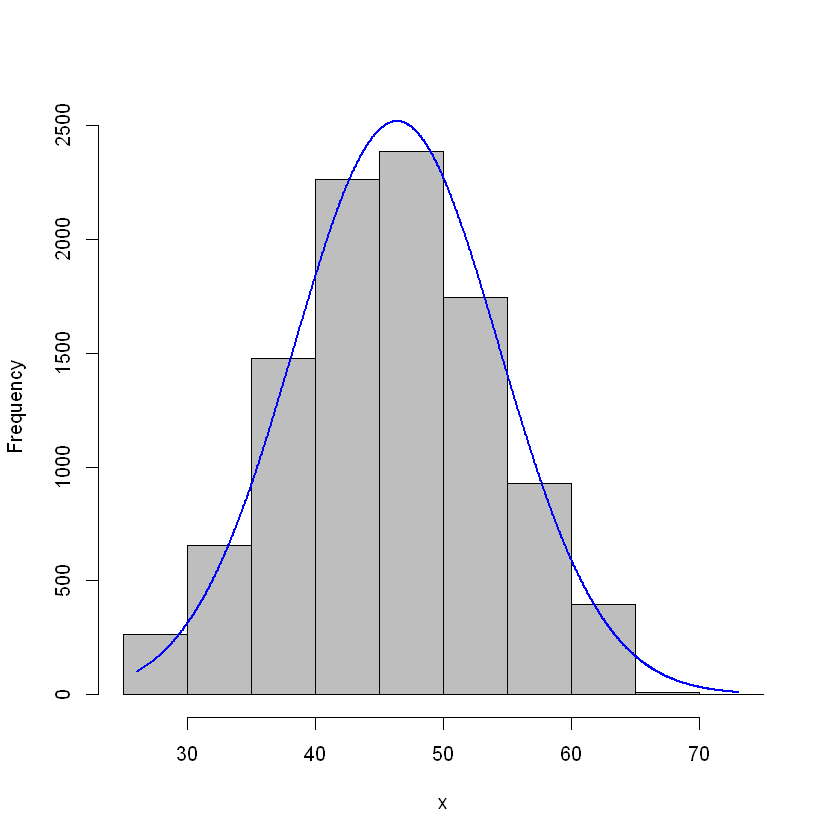

In [38]:
plotNormalHistogram(cc1$Customer_Age)
## This looks approx. normally distributed - alright!

## Homogeneity of Variance

You can test for homogeneity of variance easily using either Bartlett's test or Fligner's Test. Bartlett's test is for when your data is normally distributed, and Fligner's test is for when your data is non-parametric. No matter which test you are using, you are looking for a non-significant test. The null hypothesis for both of these is that the data has equal variance, so you'd like to have a p value of > .05. You have already determined your data is normally distributed, so ordinarily you would just perform Bartlett's test, but just for learning purposes, you'll try both here.

### Bartlett's Test

To do Bartlett's test, use the function bartlett.test(), with the argument of the y data separated by a tilde, followed by the x data. Then there's an argument data=, which is where you will specify the name of your dataset.

In [39]:
bartlett.test(Customer_Age ~ Card_Category, data = cc1)


	Bartlett test of homogeneity of variances

data:  Customer_Age by Card_Category
Bartlett's K-squared = 22.243, df = 3, p-value = 5.806e-05


The p value associated with this test is < .05, which means that unfortunately, you have violated the assumption of homogeneity of variance.

In [42]:
## this kind of makes sense, as cc customers of all ages have various levels of credit, 
## so there is more reason to believe that there is heterogeneity of variance

### Fligner's Test

To perform Fligner's test, use the function fligner.test(), with the argument of the y data separated by a tilde, followed by the x data. Then there's an argument data=, which is where you will specify the name of your dataset.

In [43]:
fligner.test(Customer_Age ~ Card_Category, data = cc1)


	Fligner-Killeen test of homogeneity of variances

data:  Customer_Age by Card_Category
Fligner-Killeen:med chi-squared = 24.825, df = 3, p-value = 1.68e-05


In [ ]:
## still shows violation of assumption of homogeneity of variance

## Correcting for Violations of Homogeneity of Variance

There are two ways that you can correct for a violation of homogeneity of variance. The first is the BoxCox transformation of your data, and the second is running a slightly different type of ANOVA, one that was created specifically to handle this violation. That test is called the Welch One-Way Test, and you'll learn about this ANOVA option.

## Sample Size

An ANOVA requires a sample size of at least 20 per independent variable. In this case, you only have one independent variable, so as long as you have at least 20 cases, you are fine. Looking at the data, the n is 10127, so you are fine to proceed with this assumption!

## Independence

There is no statistical test for the assumption of independence.

In [44]:
#### Page 5

## Computing ANOVAs with Equal Variance (Met Homogeneity of Variance Assumption)

In this case, your data did not meet this assumption, but for the purposes of learning, you'll be shown what to do if you had.

Below is the code to run a one-way ANOVA in R. You can give your ANOVA a name; this one is named cc1ANOVA. Then you want to use the function aov(). The argument for this function is your y variable, which is continuous, followed by a tilde and then your x variable, which is categorical. Remember that the tilde reads as "by," so you can think of this as analyzing age by card category.

In [46]:
cc1ANOVA <- aov(cc1$Customer_Age ~ cc1$Card_Category)

You need to utilize the summary() function:

In [47]:
summary(cc1ANOVA)

                     Df Sum Sq Mean Sq F value Pr(>F)
cc1$Card_Category     3    371  123.71   1.925  0.123
Residuals         10123 650420   64.25               

The first row of the output has the Df, or degrees of freedom. The row for your category is calculated as # of Levels - 1, so that is always a good gut check. Next, you have rows for the Sum Sq and Mean Sq; these are just some of the calculations that went into getting your F value, which is the test statistic for an ANOVA. The real meat that you want to pay attention to is the F value itself and the associated p value next to it. Like anything else, if this value is less than .05, the test was significant. If you ever need a reminder of that, you can look at the star and Signif. codes down at the bottom - there's one star listed, so it is significant at .05.

In [48]:
## the star and signif codes do not appear in R/Jup Lab

## Computing ANOVAs with Unequal Variance (Violated Homogeneity of Variance Assumption)

If you need to correct for violating the assumption of homogeneity of variance, you can run an ANOVA that was meant to correct for that violation, using a Welch's One-Way Test. To do this, you will actually create a linear model first, and then use the function Anova() on it.

In [50]:
## this is the ANOVA we would like to run since we have heterogeneity of variance

First, create and name a linear model that uses the same set up as the ANOVA with equal variance. Then, call the Anova() function on that named model, include the argument of Type= and set it to "II" because this is a between subjects ANOVA, and then use the argument white.adjust=TRUE. This last part, setting white.adjust= to TRUE, is what makes this ANOVA appropriate when you have unequal variance.

In [51]:
ANOVA <- lm(Customer_Age ~ Card_Category, data = cc1)
Anova(ANOVA, Type="II", white.adjust=TRUE)

Coefficient covariances computed by hccm()



,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>
Card_Category,3,2.580543,0.05172408
Residuals,10123,NA,NA


In [52]:
## need to run in R to see the star and signif codes

## Post Hocs

Now the problem with an ANOVA is that you have multiple groups. When you found significance with a t-test, you were able to just look at the means and you knew where the significant differences lie. You knew what was higher, and what was lower. But with an ANOVA, you can't just look at the means right away, because the F and associated p value just let you know that there is a difference between at least set of the three categories. In your example, the mean prices could be different between the beauty and food and drink category, the beauty and photography category, the food and drink and photography category, or some combination of those three!

That's where post hocs come in. They are specifically designed to test all the pairs between your data, which is why they are also often known as pairwise comparisons. This is done with t-tests. But the inherent problem with using multiple t-tests is that the more analyses you run, the more you increase your chances of Type I error. So you're more likely to find something significant when it really isn't. So, typically a post hoc will apply a correction, or adjustment, so that the t-tests become more stringent, and you are therefore correcting for doing multiple t-tests by applying stricter criteria. That way your Type I error doesn't run rampant!

There are many different corrections you can apply. But the most common ones you'll hear about are Tukey, Bonferroni, Holm, and Scheffe. All named by after the people who came up with them, by the way. These three are in order of how much correction they apply, with Tukey applying the least correction and Scheffe applying the most. Unfortunately, R does not compute Tukey and Scheffe automatically, so you'll stick to exploring the difference between no correction at all, and a Bonferroni correction.

## Computing Post Hocs with No Adjustment

Use the pairwise.t.test() function, with the arguments of the two variables you are crossing, and the argument p.adjust=. To show you why a correction is necessary, you will start out with a value of "none", which means that no correction is being made for Type I error. Here are the results:

Here is the code for computing a post hoc in R:

In [54]:
pairwise.t.test(cc1$Customer_Age, cc1$Card_Category, p.adjust="none")
## no correction for Type 1 Error


	Pairwise comparisons using t tests with pooled SD 

data:  cc1$Customer_Age and cc1$Card_Category 

         Blue  Gold  Platinum
Gold     0.213 -     -       
Platinum 0.530 0.288 -       
Silver   0.048 0.770 0.318   

P value adjustment method: none 

What is presented in the matrix above is the p values for each t-test between the pairs of the levels of your independent variable. Reading this, you can see that there was not a significant difference in age between Gold and Blue, Platinum and Blue, Gold and Platinum, Gold and Silver, and Silver and Platinum.  There is, however, a significant difference between the age of customers using Blue and Silver cards, at p = .048.

## Computing Post Hocs with Bonferroni Adjustment

You may be pretty pleased with finding a significant difference in age between card categories. But guess what? That difference may not really exist, because by running four t-tests, you may have increased your Type I error. So, better to typically stick with some form of correction, like Bonferroni. It is relatively "mild," but gets the job done!

In [56]:
pairwise.t.test(cc1$Customer_Age, cc1$Card_Category, p.adjust="bonferroni")
## here we are correcting for Type 1 Error
## taking into a count the several t-tests we are running


	Pairwise comparisons using t tests with pooled SD 

data:  cc1$Customer_Age and cc1$Card_Category 

         Blue Gold Platinum
Gold     1.00 -    -       
Platinum 1.00 1.00 -       
Silver   0.29 1.00 1.00    

P value adjustment method: bonferroni 

We see that our significant p-value is no longer significant.

We also see that our non-significant p-values became even more non-significant.With Blue and Gold, going from 0.213 to 1.00, and with others.

Since a p value can only be between 0 and 1, that's the end of line; as non-significant as something gets. This has just demonstrated why it's important to always, always, apply a correction to your post hocs!

## Computing Post Hocs When You've Violated the Assumption of Homogeneity of Variance

There is an easy solution to computing post hocs when you have violated the assumption of homogeneity of variance. You'll use the same codes as above, but include the argument pool.sd = FALSE at the end. Like this:

In [58]:
pairwise.t.test(cc1$Customer_Age, cc1$Card_Category, p.adjust="bonferroni", pool.sd = FALSE)


	Pairwise comparisons using t tests with non-pooled SD 

data:  cc1$Customer_Age and cc1$Card_Category 

         Blue Gold Platinum
Gold     0.80 -    -       
Platinum 1.00 0.62 -       
Silver   0.20 1.00 0.70    

P value adjustment method: bonferroni 

This provides a very similar output, the only difference being that is was calculated with non-pooled standard deviations, as noted at the top.

As you can see, once you've correct for this assumption, your results are more accurate, and your pairwise comparisons are still not significant, but give a more accurate p-value.

## Determine Means and Draw Conclusions

If you had found a significant difference after correction, you would want to then finish interpreting the results and draw some conclusions. To do that, you need to examine the means! Again, dplyr nicely comes to the rescue.

In [61]:
cc1Means = cc1 %>% group_by(Card_Category) %>% summarize(Mean = mean(Customer_Age))

In [62]:
cc1Means

Card_Category,Mean
<chr>,<dbl>
Blue,46.37240
Gold,45.43966
Platinum,47.50000
Silver,45.67928


Had you passed the corrected post-hoc with this data, you would have been able to look at the means and say that the Platinum card had a significantly higher average customer age than Gold or Silver cards. But, looking at these means, which are extremely close, it makes sense that this significant finding would "wash out" after Bonferroni correction. Is the difference between 45.5 years and 47.5 years really all that different?